In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [81]:
df = pd.read_csv('economy_foreign_trade.csv')

In [150]:
# Filter the DataFrame for the years 2013 to 2023
filtered_df = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

In [151]:
# Calculate total trade value by state and select the top 10 within the filtered years
total_trade_by_state = filtered_df.groupby('State')['Trade Value'].sum().nlargest(10)

In [152]:
# Filter the original DataFrame to only include the top 10 states from the filtered years
top_states_df = filtered_df[filtered_df['State'].isin(total_trade_by_state.index)]

In [153]:
# Pivot the data to get states as rows and industries as columns
pivoted_df = top_states_df.pivot_table(index='State', columns='Year', values='Trade Value', aggfunc='sum')

In [154]:
# Sort the pivoted DataFrame in ascending order based on the total trade value
pivoted_df['Total Trade Value'] = pivoted_df.sum(axis=1)
pivoted_df.sort_values('Total Trade Value', inplace=True)
pivoted_df.drop(columns='Total Trade Value', inplace=True)  # Drop the total column used for sorting

In [155]:
# Generate a color palette with distinct colors
colors = sns.color_palette("husl", pivoted_df.shape[1])  # One color per industry

<Figure size 1200x800 with 0 Axes>

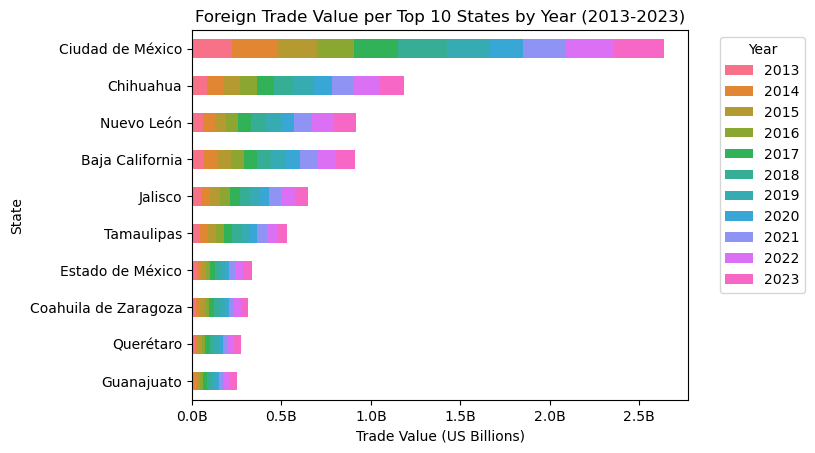

In [156]:
# Plotting the horizontal stacked bar chart
plt.figure(figsize=(12, 8))
ax = pivoted_df.plot(kind='barh', stacked=True, color=colors)
plt.title('Foreign Trade Value per Top 10 States by Year (2013-2023)')
plt.xlabel('Trade Value (US Billions)')
plt.ylabel('State')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Lambda function to format the x-axis labels in trillions
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-12:.1f}B'))

plt.show()

In [157]:
# Grouping by State and summing the Trade Values
grouped_df1 = df.groupby('State')['Trade Value'].sum().reset_index()

In [158]:
# Sorting the DataFrame by Trade Value and selecting the top 10
sorted_grouped_df1 = grouped_df1.sort_values(by='Trade Value', ascending=False)
top_10_df1 = sorted_grouped_df1.head(10)

# Summing the Trade Values for the rest of the states
others_value_df1 = sorted_grouped_df1.iloc[10:]['Trade Value'].sum()

In [159]:
# Creating a new DataFrame for the pie chart
pie_data = top_10_df1.append(pd.DataFrame({'State': ['Others'], 'Trade Value': [others_value_df1]}))

/var/folders/hr/3ykqsg891cngjjlr30f5yspr0000gn/T/ipykernel_18608/3897978554.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_data = top_10_df1.append(pd.DataFrame({'State': ['Others'], 'Trade Value': [others_value_df1]}))


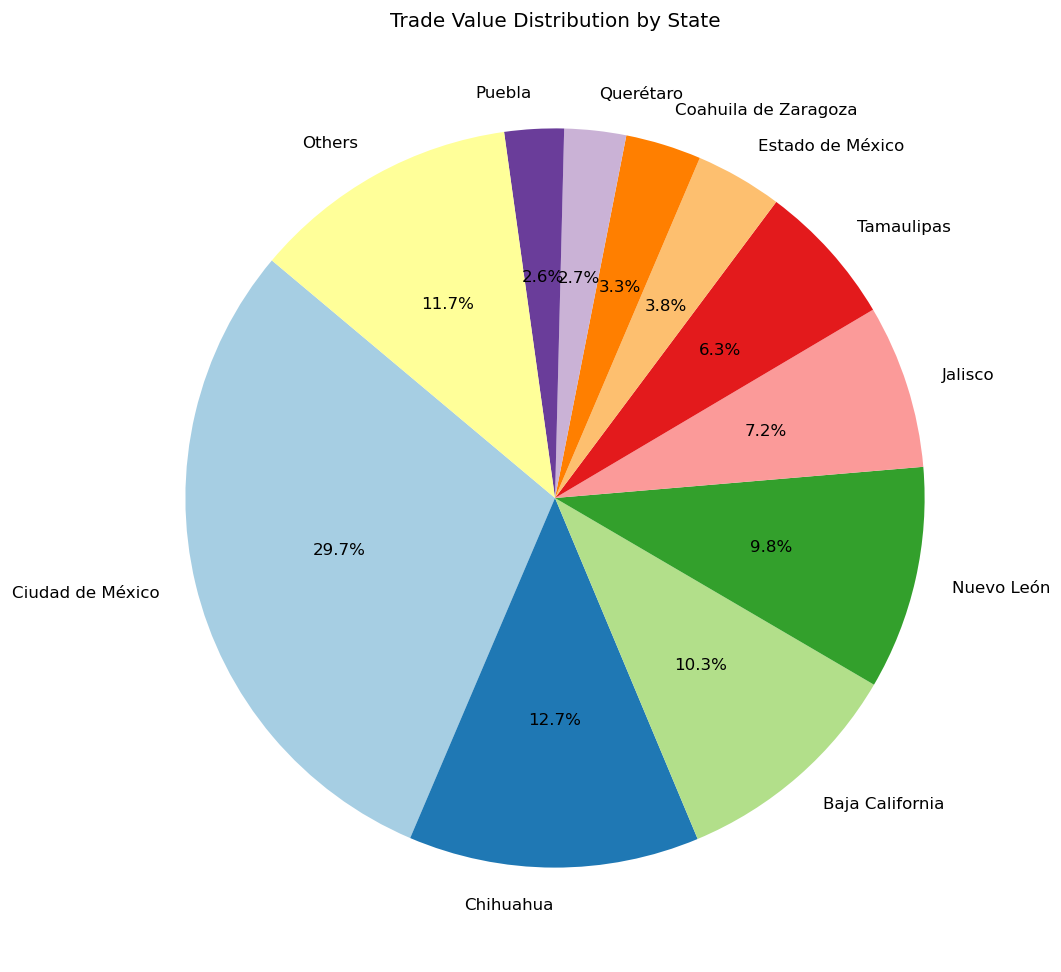

In [160]:
plt.figure(figsize=(20, 10),dpi=120)
plt.pie(pie_data['Trade Value'], labels=pie_data['State'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Trade Value Distribution by State')
plt.show()

In [161]:
# Calculate total trade value by state and select the top 10 within the filtered years
total_trade_by_country = filtered_df.groupby('Country')['Trade Value'].sum().nlargest(10)
total_trade_by_country

Country
United States                 5691587303169
China                          935718694643
Canada                         232265167425
Japan                          220293911413
Germany                        215589482107
South Korea                    199690004705
Brazil                         109401143759
Malaysia                       108609270811
Taiwan (Republic of China)     103338596914
Spain                           83817872319
Name: Trade Value, dtype: int64

In [162]:
# Filter the original DataFrame to only include the top 10 states from the filtered years
top_country_df = filtered_df[filtered_df['Country'].isin(total_trade_by_country.index)]
top_country_df

,Country ID,Country,Year,State ID,State,Chapter 2 Digit ID,Chapter 2 Digit,Trade Value
59534,bra,Brazil,2013,1,Aguascalientes,6,Chemical Products,14197
59535,bra,Brazil,2013,1,Aguascalientes,7,Plastics and Rubbers,2959325
59536,bra,Brazil,2013,1,Aguascalientes,8,Animal Hides,24
59537,bra,Brazil,2013,1,Aguascalientes,9,Wood Products,673129
59538,bra,Brazil,2013,1,Aguascalientes,10,Paper Goods,1821537
...,...,...,...,...,...,...,...,...
498353,usa,United States,2023,33,Uninformed,13,Stone and Glass,64419
498354,usa,United States,2023,33,Uninformed,15,Metals,905222
498355,usa,United States,2023,33,Uninformed,16,Machines,899136
498356,usa,United States,2023,33,Uninformed,17,Transportation,347727


In [163]:
# Pivot the data to get states as rows and industries as columns
pivoted_df2 = top_country_df.pivot_table(index='Country', columns='Year', values='Trade Value', aggfunc='sum')

In [164]:
# Sort the pivoted DataFrame in ascending order based on the total trade value
pivoted_df2['Total Trade Value'] = pivoted_df2.sum(axis=1)
pivoted_df2.sort_values('Total Trade Value', inplace=True)
pivoted_df2.drop(columns='Total Trade Value', inplace=True)  # Drop the total column used for sorting

In [165]:
# Generate a color palette with distinct colors
colors = sns.color_palette("husl", pivoted_df2.shape[1])  # One color per industry

<Figure size 1200x800 with 0 Axes>

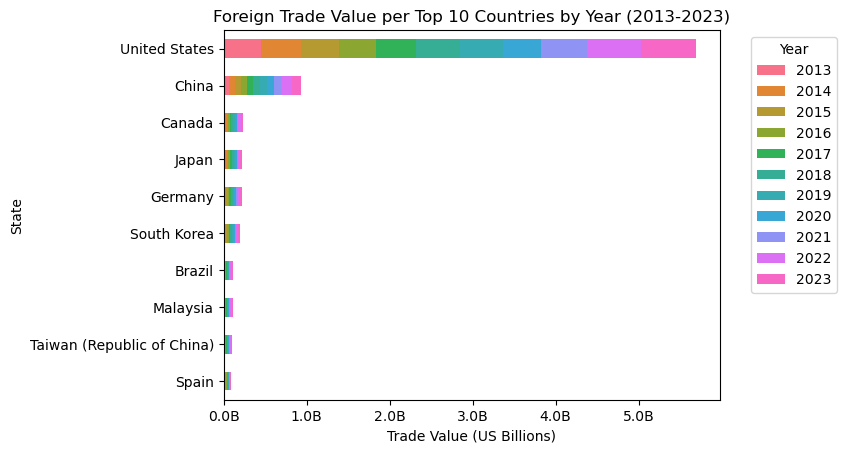

In [166]:
# Plotting the horizontal stacked bar chart
plt.figure(figsize=(12, 8))
ax = pivoted_df2.plot(kind='barh', stacked=True, color=colors)
plt.title('Foreign Trade Value per Top 10 Countries by Year (2013-2023)')
plt.xlabel('Trade Value (US Billions)')
plt.ylabel('State')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Lambda function to format the x-axis labels in trillions
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-12:.1f}B'))

plt.show()

In [167]:
# Grouping by State and summing the Trade Values
grouped_df2 = df.groupby('Chapter 2 Digit')['Trade Value'].sum().reset_index()

In [168]:
# Sorting the DataFrame by Trade Value and selecting the top 10
sorted_grouped_df2 = grouped_df2.sort_values(by='Trade Value', ascending=False)
top_10_df2 = sorted_grouped_df2.head(10)

# Summing the Trade Values for the rest of the states
others_value_df2 = sorted_grouped_df2.iloc[10:]['Trade Value'].sum()

In [169]:
# Creating a new DataFrame for the pie chart
pie_data2 = top_10_df2.append(pd.DataFrame({'Chapter 2 Digit': ['Others'], 'Trade Value': [others_value_df2]}))

/var/folders/hr/3ykqsg891cngjjlr30f5yspr0000gn/T/ipykernel_18608/2616356097.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_data2 = top_10_df2.append(pd.DataFrame({'Chapter 2 Digit': ['Others'], 'Trade Value': [others_value_df2]}))


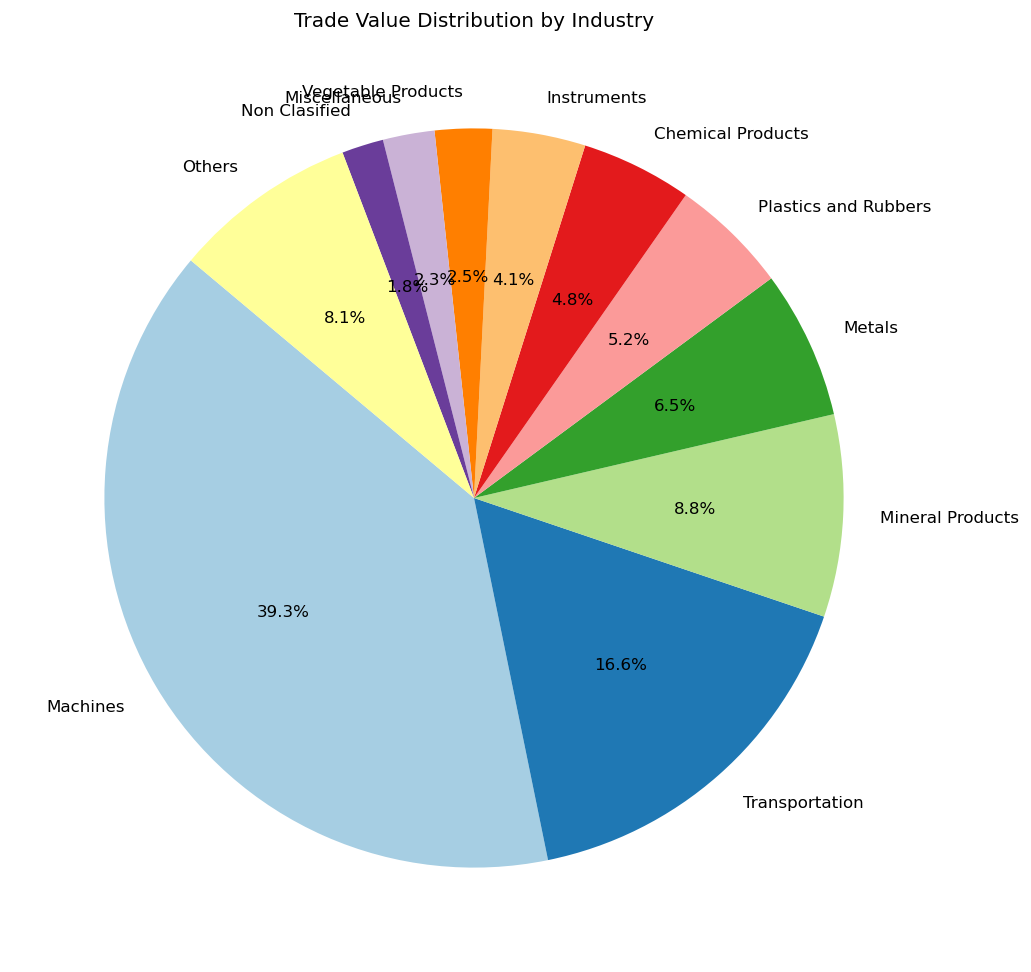

In [170]:
plt.figure(figsize=(20, 10),dpi=120)
plt.pie(pie_data2['Trade Value'], labels=pie_data2['Chapter 2 Digit'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Trade Value Distribution by Industry')
plt.show()